In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [4]:
#Import Iris dta
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

#split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [5]:
#Run the classifier model  
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train,y_train).predict(X_test)

In [10]:
cm = confusion_matrix(y_test,y_pred)
#Only use labels that appear in the data
classes = class_names[unique_labels(y_test,y_pred)]
print(cm)

[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


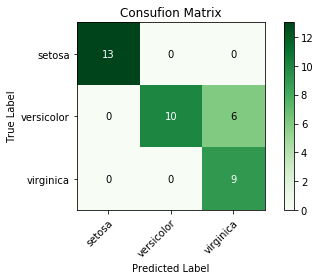

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest',cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title = 'Consufion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

plt.setp(ax.get_xticklabels(), 
         rotation=45, ha='right', rotation_mode="anchor")

fmt = 'd'
thresh = cm.max()/2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j,i,format(cm[i,j], fmt),
                ha="center",
                va="center",
                color = "white" if cm[i,j] >thresh else "black")
fig.tight_layout()
            